<a href="https://colab.research.google.com/github/cam2149/MachinelearningI/blob/main/Examen1_Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 1

### Integrantes

- Yesid Castelblanco
- Andres Felipe Borrero
- Carlos Alberto Martinez Ramirez
- Nicolas Colmenares

### **Profesores**

- Santiago Ortiz
- Henry Velasco

Fecha: _ de 2024

# Ejercicio 1

## Datos

Considere el conjunto de datos “data1” del fichero data_exam1.xls

### Puntos

1. Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la
respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

2. Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind. ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con
interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el
respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [75]:
url = 'https://github.com/cam2149/MachinelearningI/raw/85795f6469ebde1f693b7cb6c893c10135408974/data_exam1.xlsx'

df=pd.read_excel(url, sheet_name='data1')

In [76]:
df

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0
...,...,...,...
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [78]:
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


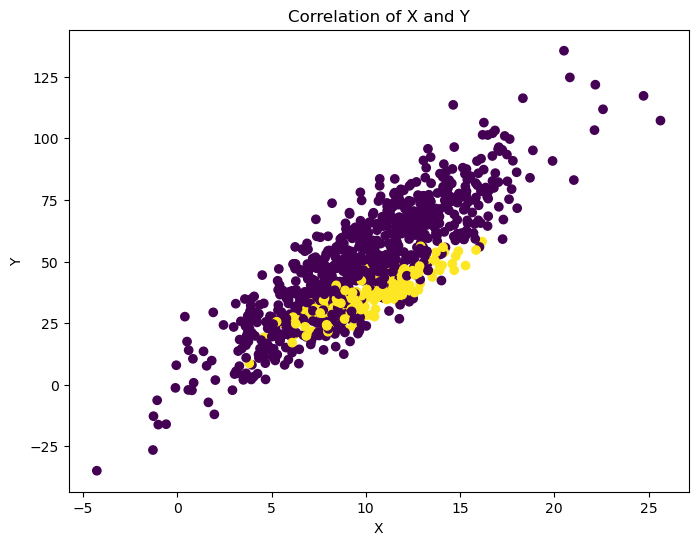

In [79]:
# @title Correlation of X and Y


plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=df['Ind'], cmap='viridis')
plt.title('Correlation of X and Y')
plt.xlabel('X')
_ = plt.ylabel('Y')

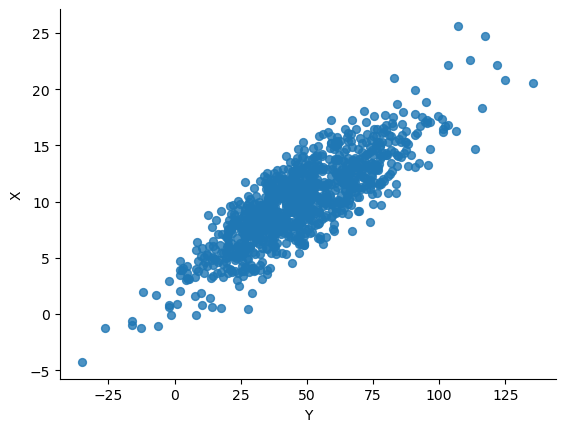

In [80]:
# @title Y vs X

df.plot(kind='scatter', x='Y', y='X', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

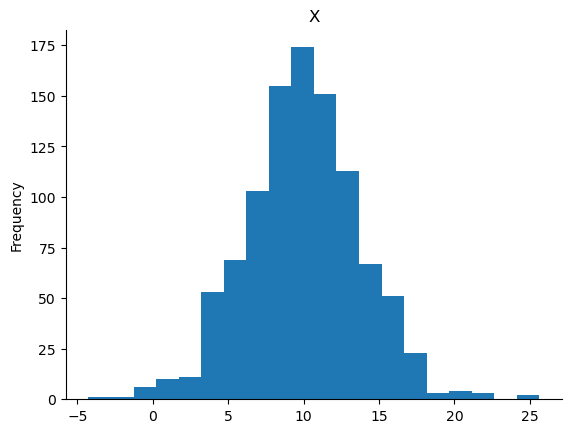

In [81]:
# @title X

df['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

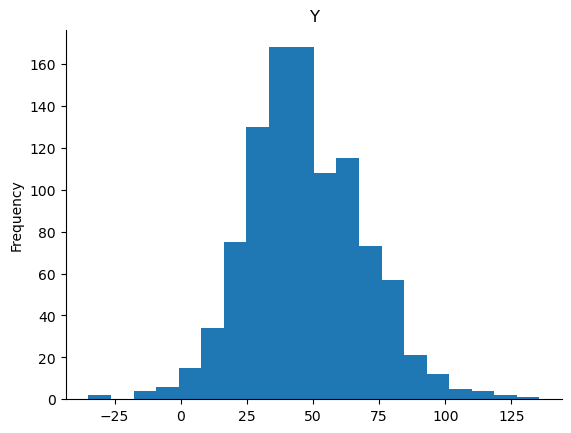

In [82]:
# @title Y

df['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

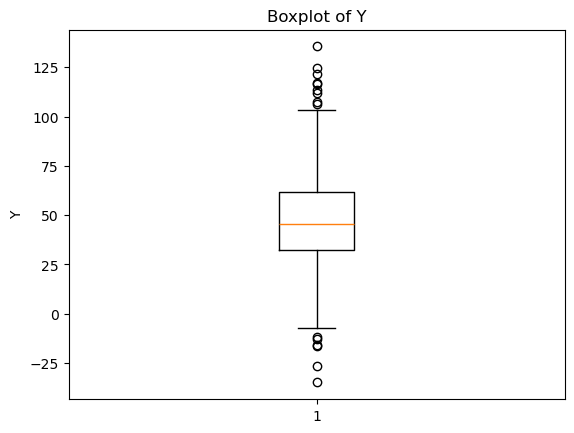

In [83]:
plt.boxplot(df['Y'])
plt.title('Boxplot of Y')
plt.ylabel('Y')
plt.show()


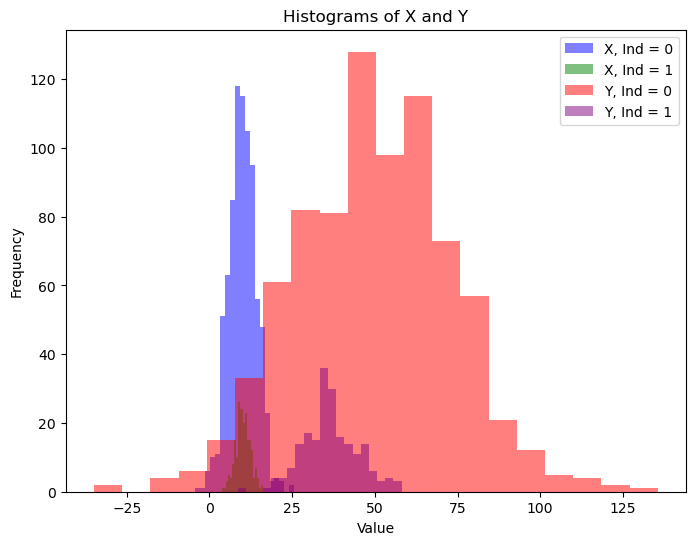

In [84]:
# @title Histograms of X and Y

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df[df['Ind'] == 0]['X'], bins=20, alpha=0.5, label='X, Ind = 0', color='blue')
plt.hist(df[df['Ind'] == 1]['X'], bins=20, alpha=0.5, label='X, Ind = 1', color='green')
plt.hist(df[df['Ind'] == 0]['Y'], bins=20, alpha=0.5, label='Y, Ind = 0', color='red')
plt.hist(df[df['Ind'] == 1]['Y'], bins=20, alpha=0.5, label='Y, Ind = 1', color='purple')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of X and Y')
_ = plt.legend()

# Ejercicio 2

## Datos

**data2** del fichero **data_exam.xlsx**

## Puntos

- De acuerdo al analisis del item anterior proponer una transformación para alguna variable y justificar
- Proponer un modelo lineal, iterpretar y validar supuestos

# Ejercicio 3

## Datos

**Wine Quality** del fichero **datos.xlsx**

**Y**= Densidad

**Eliminar:**

- PH
- Sulfatos
- Cloruros
- Acidez Volátil
- Acidez Fija
- Calidad de Vino

## Puntos

1. Estandarizar variables y calcular matrices de correlación de **Pearson**, **Kendall** y **Spearman**. ¿Qué diferencia hay entre las dependencias obtenidas?
2. Realizar particios de datos 80-20.
  - Construir 3 modelos RLM.
  - Comparar e interpretar los valores de los coeficientes de regresión en cada método.
3. ¿Cuál de los modelos propuestos predice mejor?
  - Realizar una predicción con los datos de prueba.
  - Calcular el RMSE.
4. Validar supuesto teóricos de cada modelo.
5. Realizar un diagrama de dispersión del conjunto de datos.
  - ¿Se evidencia comportamientos lineales?
  - Si no son lineales realizar transformaciones de varaibles y justificar.
  - Generar un modelo RLM e interpretar.

In [85]:
# Get Excel file from GitHub
url = 'https://github.com/cam2149/MachinelearningI/blob/main/datos.xls?raw=true'
# Read the sheet 'Wine Quality' into a DataFrame df ignoring the first 2 rows
df = pd.read_excel(url, sheet_name='Wine Quality', skiprows=2)

In [86]:
# Visualize the first 5 rows of the DataFrame
df.head()

,Calidad del Vino,Acidez Fija,Acidez Volátil,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,pH,Sulfatos,Alcohol
0,6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [87]:
# Remove columns pH, Sulfatos, Cloruros, Acidez Volátil, Acidez Fija, and Calidad del Vino
df.drop(columns=['pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil', 'Acidez Fija', 'Calidad del Vino'], inplace=True)

# Visualize the first 5 rows of the DataFrame
df.head()

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,0.36,20.7,45.0,170.0,1.0010,8.8
1,0.34,1.6,14.0,132.0,0.9940,9.5
2,0.40,6.9,30.0,97.0,0.9951,10.1
3,0.32,8.5,47.0,186.0,0.9956,9.9
4,0.32,8.5,47.0,186.0,0.9956,9.9


In [88]:
# Define Densidad as the target variable (Y) and the rest of the columns as the features (X)
x = df.drop(columns='Densidad')
y = df['Densidad']
x.describe()

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.334192,6.391415,35.308085,138.360657,10.514267
std,0.121020,5.072058,17.007137,42.498065,1.230621
min,0.000000,0.600000,2.000000,9.000000,8.000000
25%,0.270000,1.700000,23.000000,108.000000,9.500000
50%,0.320000,5.200000,34.000000,134.000000,10.400000
75%,0.390000,9.900000,46.000000,167.000000,11.400000
max,1.660000,65.800000,289.000000,440.000000,14.200000


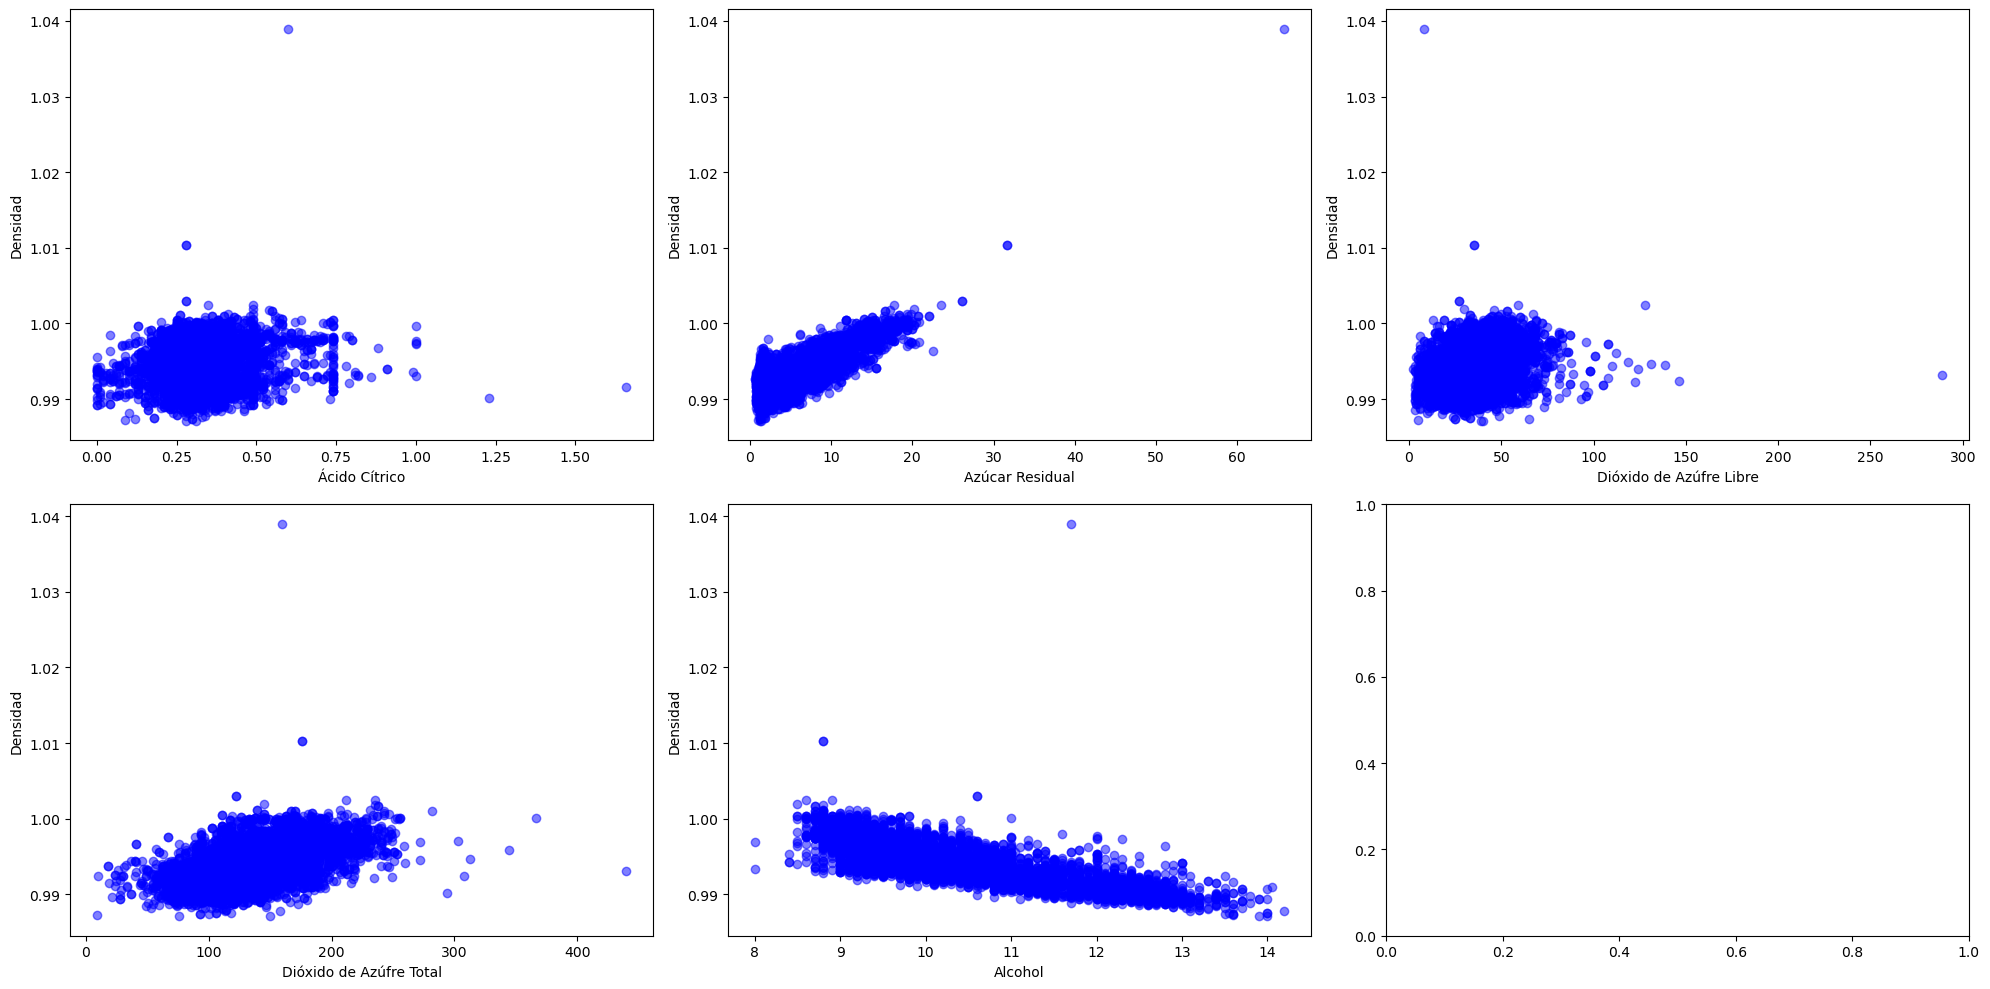

In [89]:
# Plot the scatter charts of the features against the target variable
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i, feature in enumerate(x.columns):
    axs[i // 3, i % 3].scatter(x[feature], y, c='blue', alpha=0.5)
    axs[i // 3, i % 3].set_xlabel(feature)
    axs[i // 3, i % 3].set_ylabel('Densidad')
plt.tight_layout()
plt.show()



In [90]:
# Standardize the features keeping the same column names
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.describe()


,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Alcohol
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,5.802717e-17,-1.066249e-16,-1.015476e-17,-4.642174e-17,-3.713739e-16
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-2.761743e+00,-1.141944e+00,-1.958677e+00,-3.044230e+00,-2.043297e+00
25%,-5.304757e-01,-9.250474e-01,-7.237750e-01,-7.144739e-01,-8.242757e-01
50%,-1.172780e-01,-2.349217e-01,-7.692173e-02,-1.026189e-01,-9.286267e-02
75%,4.611988e-01,6.918185e-01,6.287364e-01,6.739664e-01,7.198184e-01
max,1.095642e+01,1.171411e+01,1.491831e+01,7.098444e+00,2.995326e+00


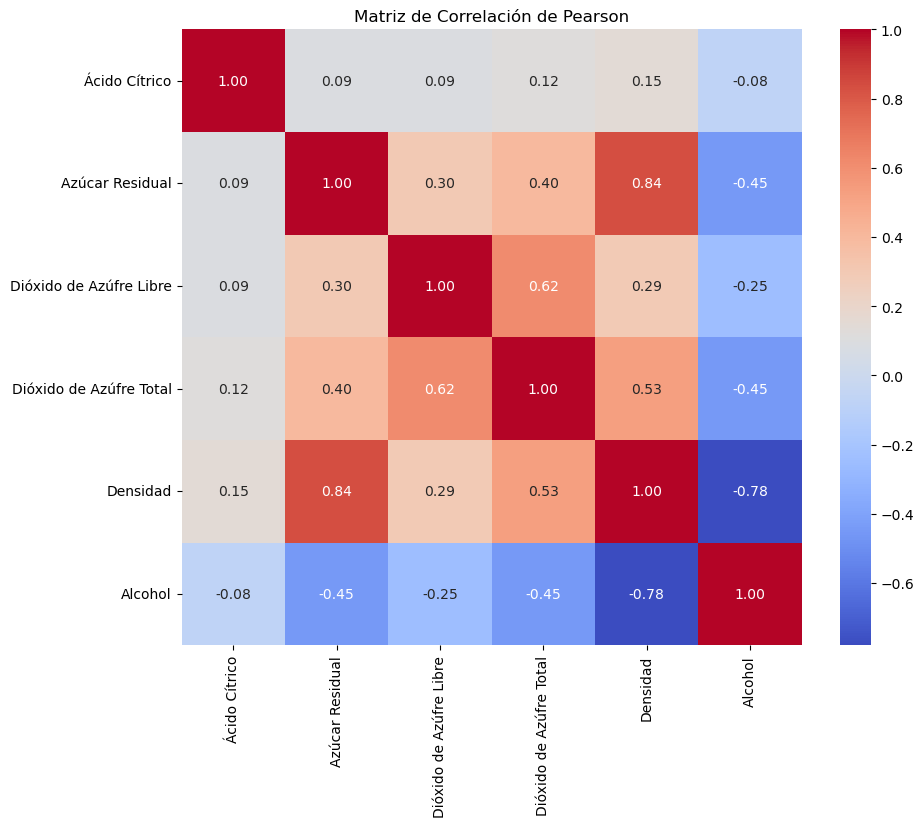

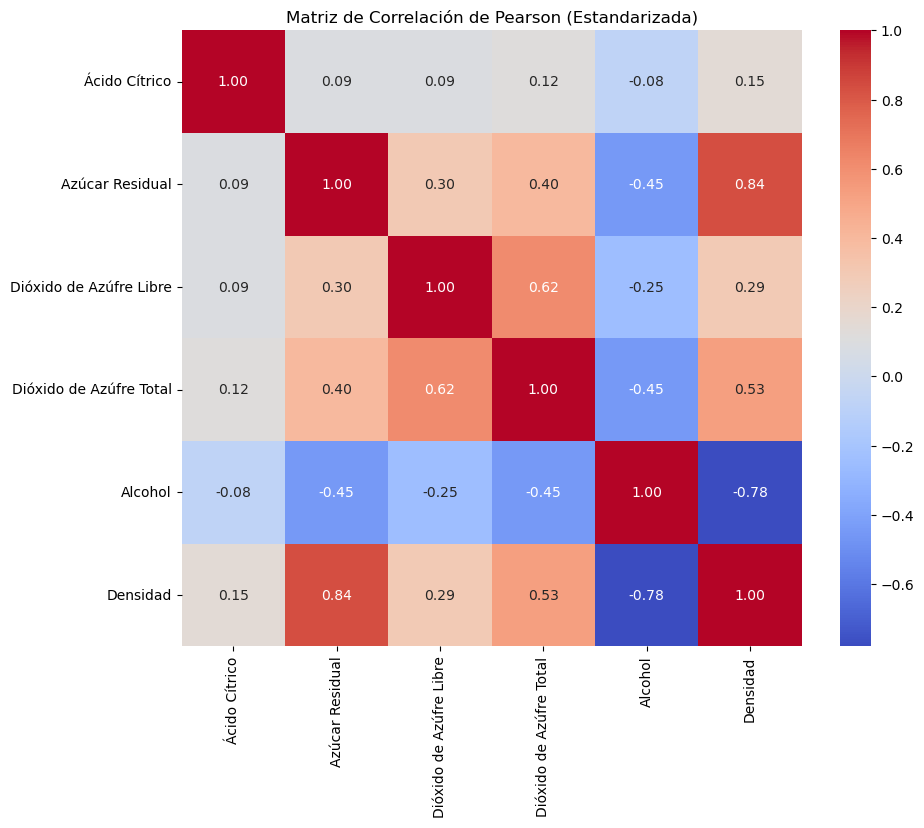

In [91]:
# Plot the Pearson correlation matrix of the features (X) and the target variable (Y) with a heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson')
plt.show()

# Now plot the Pearson correlation matrix of the standardized features (X) and the target variable (Y) with a heatmap
corr = x.join(y).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson (Estandarizada)')
plt.show()




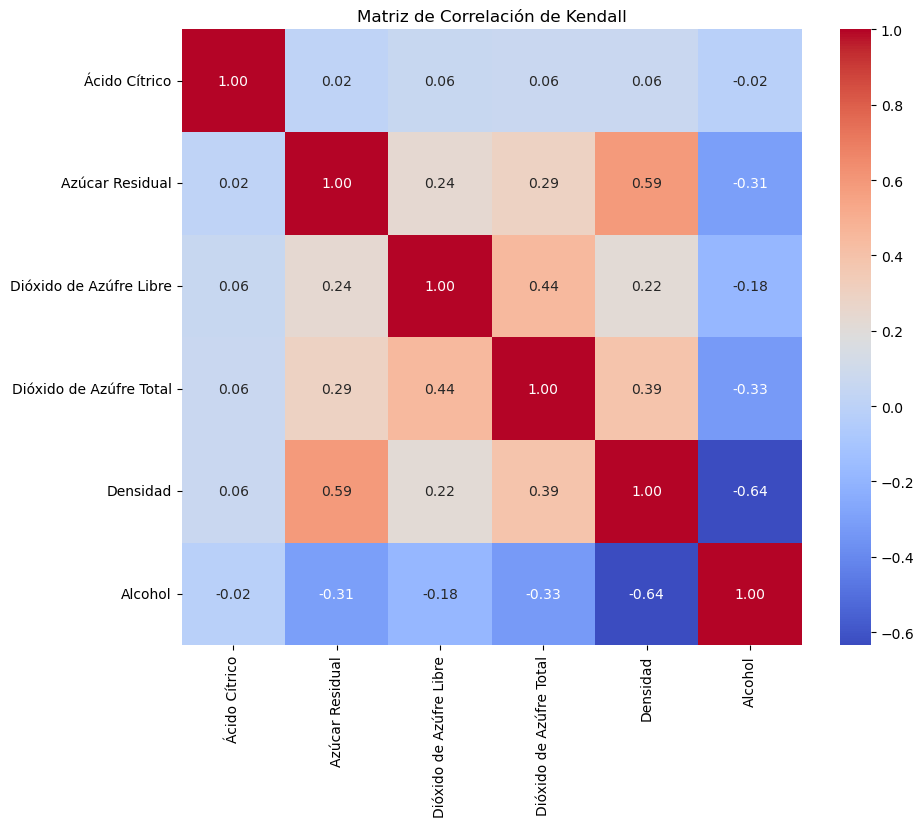

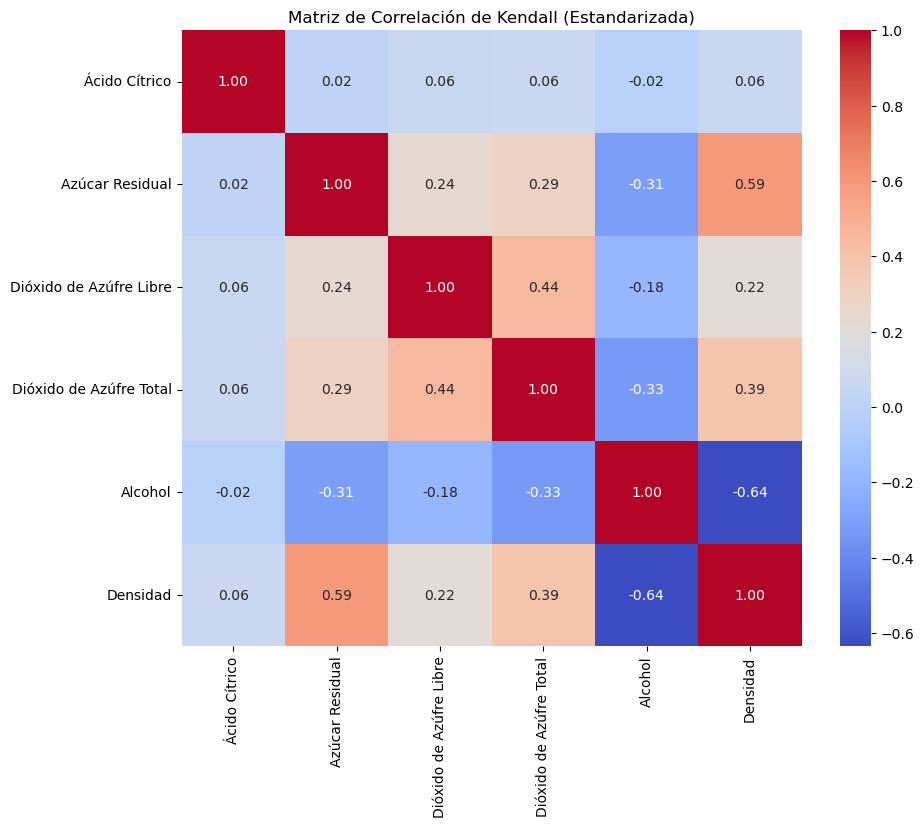

In [92]:
# Plot the Kendall correlation matrix of the features (X) and the target variable (Y) with a heatmap
corr = df.corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Kendall')
plt.show()

# Now plot the Kendall correlation matrix of the standardized features (X) and the target variable (Y) with a heatmap
corr = x.join(y).corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Kendall (Estandarizada)')
plt.show()


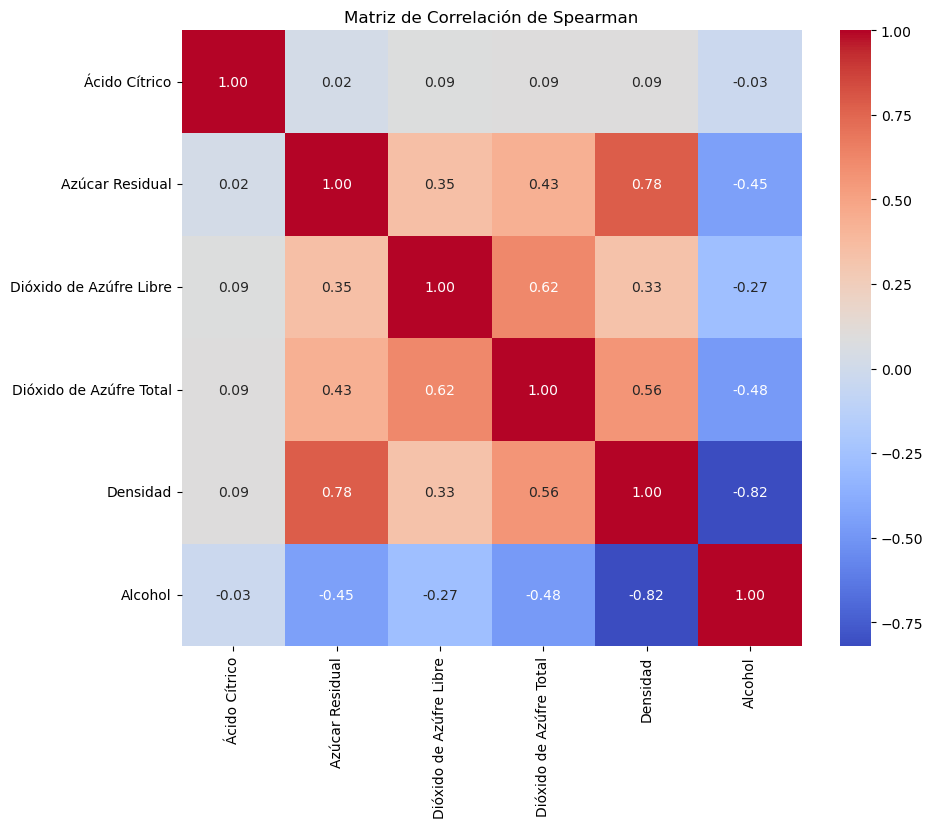

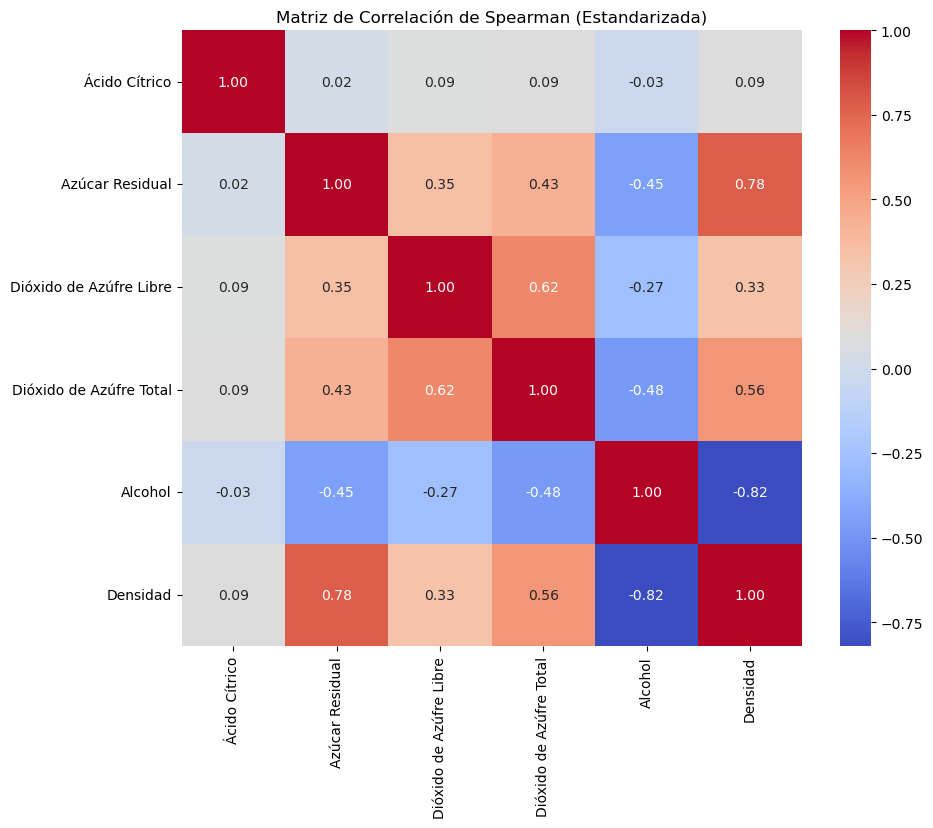

In [93]:
# Plot the Spearman correlation matrix of the features (X) and the target variable (Y) with a heatmap
corr = df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Spearman')
plt.show()

# Now plot the Spearman correlation matrix of the standardized features (X) and the target variable (Y) with a heatmap
corr = x.join(y).corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Spearman (Estandarizada)')
plt.show()


In [94]:
# Partition the data into training and testing sets 80/20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

###### Regresión Lineal ######
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression
print ("Regresión Lineal: ")
# Create an instance of the Linear Regression model
linear_regression_model = LinearRegression()

# Train the model with the training data
linear_regression_model.fit(x_train, y_train)

# Predict the target variable using the testing data
y_pred = linear_regression_model.predict(x_test)

# Print the coefficients of the model
print("Coeficientes del modelo: ", linear_regression_model.coef_)


# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) of the model
mse_RL = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE): ", mse_RL)

# Raiz del error cuadrático medio
rmse = np.sqrt(mse_RL)
print("Raíz del Error Cuadrático Medio (RMSE): ", rmse)

# Import the r2_score function
from sklearn.metrics import r2_score

# Calculate the R^2 score of the model
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R^2: ", r2)


# Import the mean_absolute_error function
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE) of the model
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE): ", mae)


###### Solución Vectorial OLS ######

# Calculate beta coefficients and intercept
# Calculate coefficients from multiple linear regression
print("\n")
import numpy as np
from numpy.linalg import inv
betas = inv(x_train.T @ x_train) @ (x_train.T @ y_train)

 # Calculate the intercept beta0
beta0 = y_train.mean() - np.dot(x_train.mean(), betas)
print("Intercepto beta0: ", beta0)
print("Coeficientes beta: ", betas)

# Calculate the predicted values
y_pred = x_test @ betas + beta0

# Calculate the Mean Squared Error (MSE) of the model
mse_OLS = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE): ", mse_OLS)
# Raiz del error cuadrático medio
rmse = np.sqrt(mse_OLS)
print("Raíz del Error Cuadrático Medio (RMSE): ", rmse)


# Calculate the R^2 score of the model
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R^2: ", r2)

# Calculate the Mean Absolute Error (MAE) of the model
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE): ", mae)



###### Regresión Ridge ######

print("\nRidge:")
# Import the Ridge model
from sklearn.linear_model import Ridge

# Create an instance of the Ridge model
ridge_model = Ridge(alpha=1.0)

# Train the model with the training data
ridge_model.fit(x_train, y_train)

# Predict the target variable using the testing data
y_pred = ridge_model.predict(x_test)

# Print the coefficients of the model
print("Coeficientes del modelo: ", ridge_model.coef_)
# print(model.coef_)
# Calculate the Mean Squared Error (MSE) of the model
mse_Ridge = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE): ", mse_Ridge)

# Raiz del error cuadrático medio
rmse = np.sqrt(mse_Ridge)
print("Raíz del Error Cuadrático Medio (RMSE): ", rmse)

# Calculate the R^2 score of the model
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R^2: ", r2)

# Calculate the Mean Absolute Error (MAE) of the model
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE): ", mae)



Regresión Lineal: 
Coeficientes del modelo:  [ 0.00013777  0.00170929 -0.0002232   0.0003755  -0.00144609]
Error Cuadrático Medio (MSE):  1.2777313593190229e-06
Raíz del Error Cuadrático Medio (RMSE):  0.0011303677982493234
Coeficiente de determinación R^2:  0.8764231869021473
Error Absoluto Medio (MAE):  0.0006222823540107333


Intercepto beta0:  0.9938111303455406
Coeficientes beta:  [-0.01237473 -0.00374191  0.00267088  0.00598694  0.00190373]
Error Cuadrático Medio (MSE):  0.00024348344936892406
Raíz del Error Cuadrático Medio (RMSE):  0.015603956208888952
Coeficiente de determinación R^2:  -22.548697068153775
Error Absoluto Medio (MAE):  0.011442601435037298

Ridge:
Coeficientes del modelo:  [ 0.00013776  0.00170887 -0.00022298  0.00037556 -0.00144583]
Error Cuadrático Medio (MSE):  1.2779645257395117e-06
Raíz del Error Cuadrático Medio (RMSE):  0.001130470930957321
Coeficiente de determinación R^2:  0.8764006360248011
Error Absoluto Medio (MAE):  0.0006222454005071718


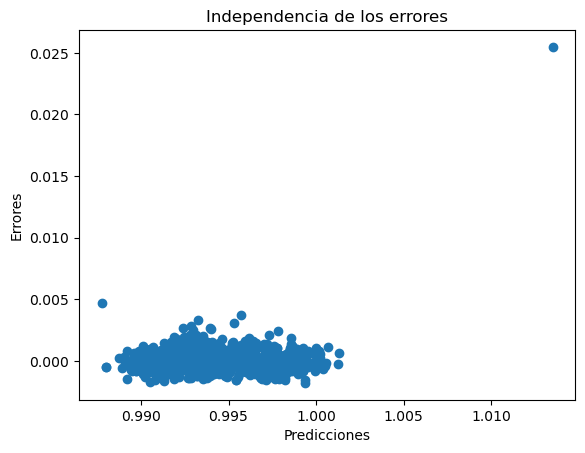

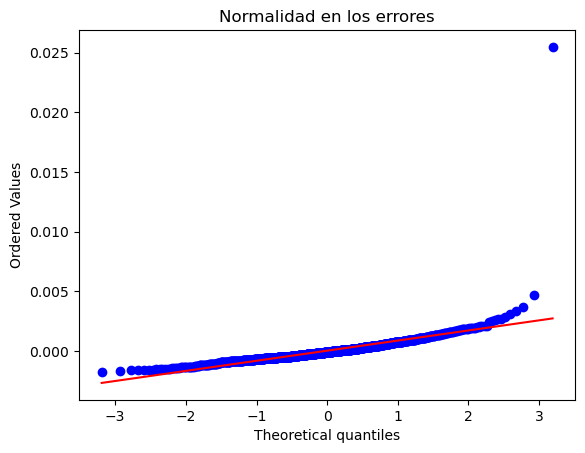

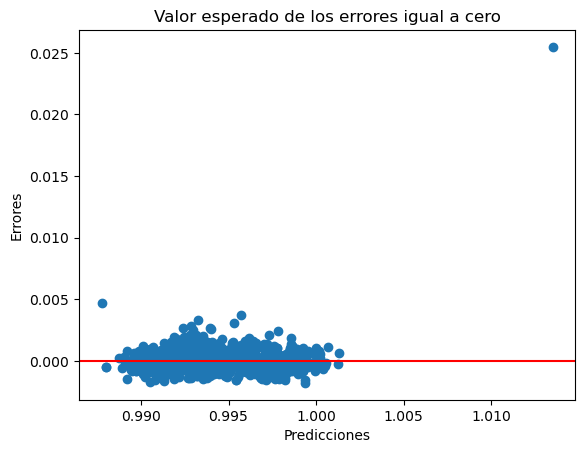

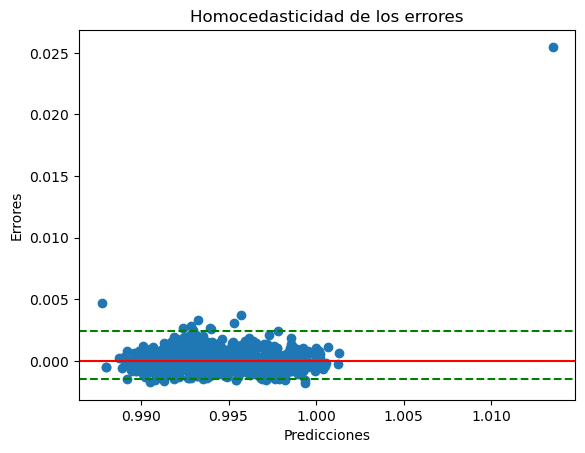

In [95]:
# Validacion de los supuestos teoridos de cada modelo

# Calculo de los errores
errores = y_test - y_pred

# Validacion de independencia de los errores donde se espera que no haya correlacion entre los errores
plt.scatter(y_pred, errores)
plt.xlabel('Predicciones')
plt.ylabel('Errores')
plt.title('Independencia de los errores')
plt.show()

# Normalidad en los errores
import scipy.stats as stats
stats.probplot(errores, dist="norm", plot=plt)
plt.title('Normalidad en los errores')
plt.show()

# Valor esperado de los errores igual a cero
plt.scatter(y_pred, errores)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicciones')
plt.ylabel('Errores')
plt.title('Valor esperado de los errores igual a cero')
plt.show()

# Homocedasticidad de los errores donde se espera que la varianza de los errores sea constante
plt.scatter(y_pred, errores)
plt.axhline(y=0, color='r', linestyle='-')
# Agregar una línea de referencia en los percentiles de los errores 99 y 1
plt.axhline(y=errores.quantile(0.99), color='g', linestyle='--')
plt.axhline(y=errores.quantile(0.01), color='g', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Errores')
plt.title('Homocedasticidad de los errores')
plt.show()



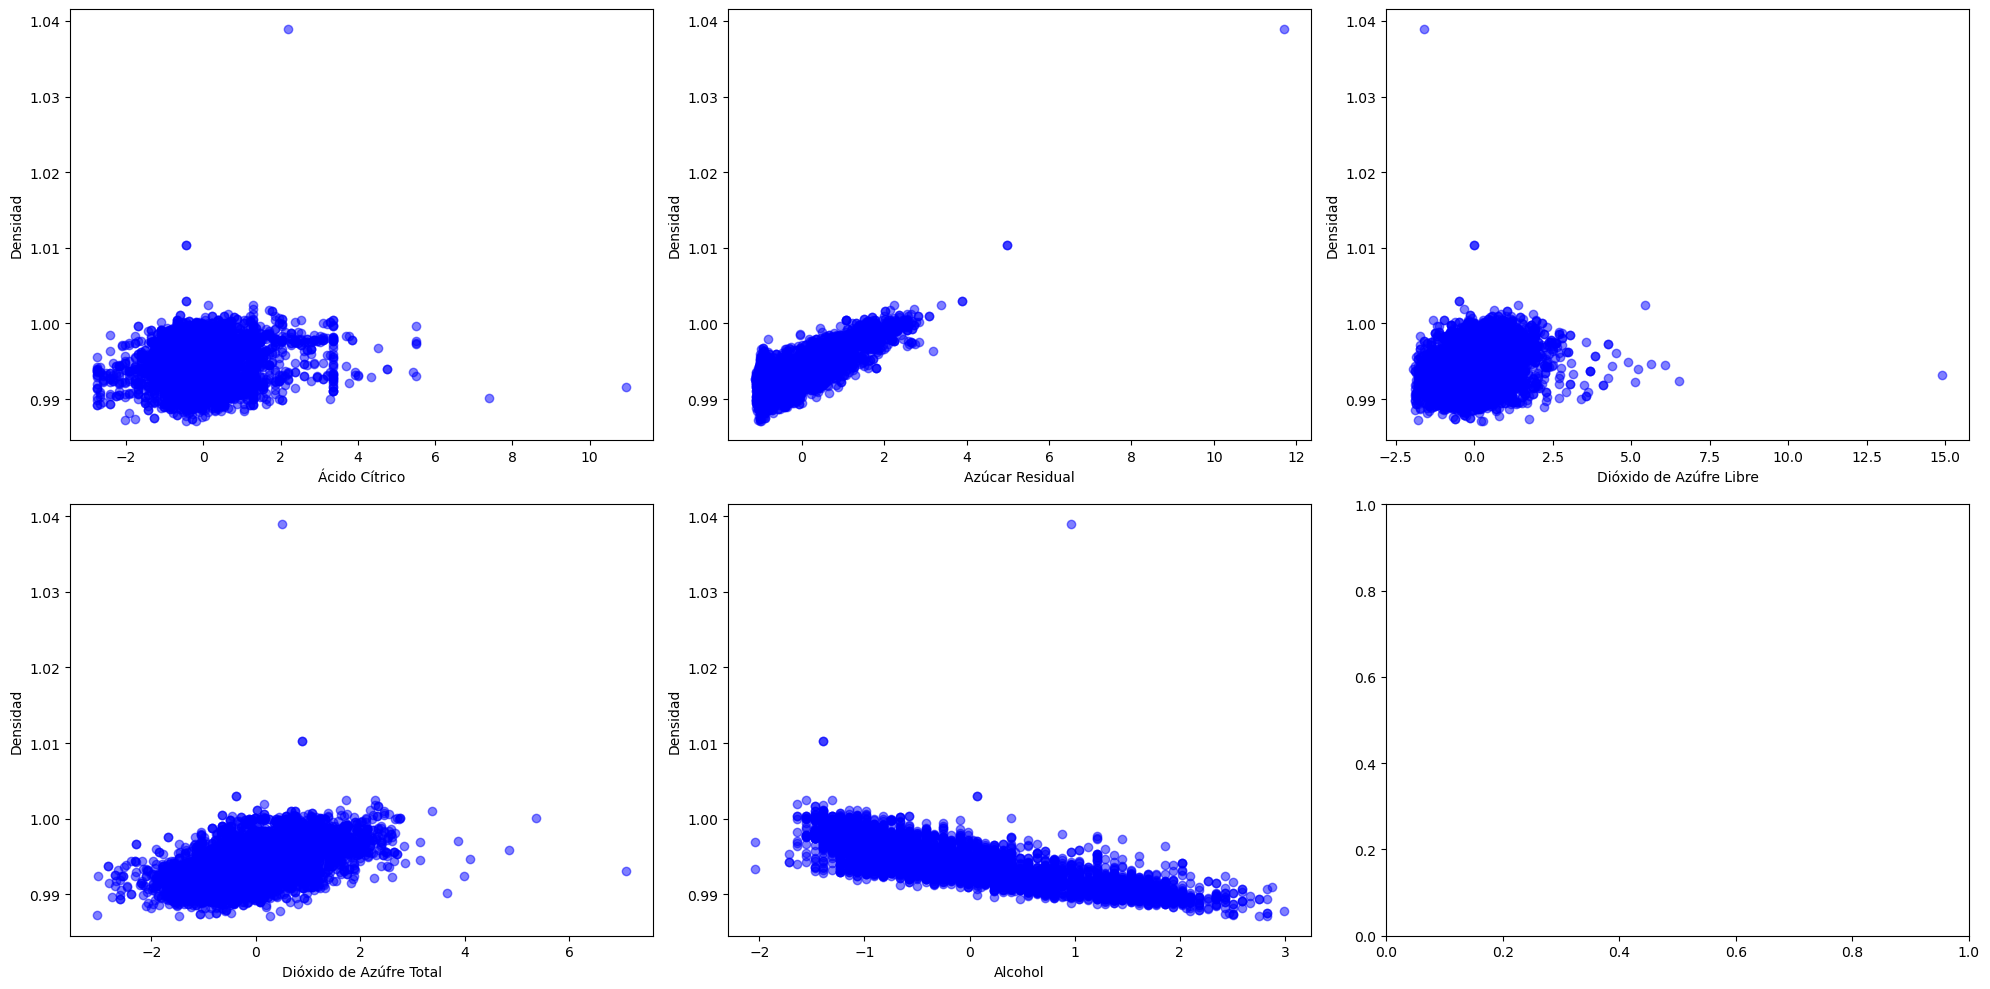

In [96]:
# Plot the scatter charts of the features against the target variable
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i, feature in enumerate(x.columns):
    axs[i // 3, i % 3].scatter(x[feature], y, c='blue', alpha=0.5)
    axs[i // 3, i % 3].set_xlabel(feature)
    axs[i // 3, i % 3].set_ylabel('Densidad')
plt.tight_layout()
plt.show()



# Ejercicio 4

## Datos

**publicidad.csv**

## Puntos

1. Graficar el retorno de la inversión **Sales** vs **TV, Radio, Newspaper**.
  - Usar scatter_matrix()
  - Interpretar graficos de las variables 2 a 2.
2. Calcular coeficiente de correlación.
  - Graficar mapa de calor de las correlaciones.
  - Interpretar las estructuras de dependencia encontradas.
3. Escoger una de las 3 variables para modelar las ventas.
  - Ajustar modelo de regresión lineal simple y encontrar la ecuación de la recta
  - ¿Cuál es el valor del coeficiente de determinación ${𝑅}^2$.
  - ¿Cómo se interpreta este valor?
4. Realizar una predicción del retorno a la inversión al realizar 5 anuncios.
  - ¿Cuál es el intervalo de confianza del 95% para la predicción?